## Recurrent Neural Networks (RNN) – Complete Notes
### 1. What is a Recurrent Neural Network (RNN)?

**A Recurrent Neural Network (RNN) is a type of Artificial Neural Network designed to work with sequential data. Unlike traditional neural networks, RNNs have a memory mechanism that allows them to store information from previous steps.**

- RNNs are mainly used when data order matters.

**Examples of Sequential Data**

- Text sentences (word by word)

- Time series data (stock prices, weather)

- Speech signals

- Video frames

### 2. Why Do We Need RNN?

- Traditional Neural Networks assume all inputs are independent. This assumption fails for sequence-based problems.

**RNN solves this by:**

- Passing information from one step to the next

- Maintaining context using a hidden state

**Example:**
- To predict the next word in a sentence, the model must understand the previous words.

### 3. Basic RNN Architecture

**An RNN processes data step by step.**

At each time step t:

- Input: x(t)

- Hidden state: h(t)

- Output: y(t)

**Mathematical Representation**
h(t) = f(Wx * x(t) + Wh * h(t-1) + b)
y(t) = Wy * h(t)

**Where:**

- Wx, Wh, Wy are weight matrices

- b is bias

- f is an activation function (usually tanh or ReLU)

#### . RNN Working Flow

- Take input at time step t

- Combine it with previous hidden state

- Apply activation function

- Produce output and pass hidden state forward

Hidden state acts as memory.

### 5. Types of RNN Based on Input-Output Structure

| Type         | Description                       | Example              |
| ------------ | --------------------------------- | -------------------- |
| One-to-One   | Standard NN                       | Image classification |
| One-to-Many  | Single input, multiple outputs    | Image captioning     |
| Many-to-One  | Multiple inputs, single output    | Sentiment analysis   |
| Many-to-Many | Multiple inputs, multiple outputs | Language translation |


### 6. Activation Functions Used in RNN

Tanh (most common)

ReLU

Sigmoid (output layer)

Tanh is preferred because it keeps values between -1 and 1.

### 7. Loss Functions in RNN

- Categorical Cross Entropy for classification

- Mean Squared Error (MSE) for regression

- Binary Cross Entropy for binary output

### 8. Training RNN – Backpropagation Through Time (BPTT)

**RNNs are trained using Backpropagation Through Time.**

Steps:

- Unroll the RNN across time steps

- Calculate loss at each step

- Compute gradients backward through time

- Update weights

### 9. Problems with Basic RNN
1. Vanishing Gradient Problem

- Gradients become very small

- Network fails to learn long-term dependencies

2. Exploding Gradient Problem

- Gradients become very large

- Causes unstable training

**These problems limit basic RNN performance.**

### 10. Solutions to RNN Problems

- Gradient clipping

- Better weight initialization

- Use advanced architectures like:

- LSTM

- GRU

### 11. Long Short-Term Memory (LSTM)

**LSTM is an advanced RNN that can remember information for a long time.**

LSTM Components

- Forget Gate

- Input Gate

- Output Gate

- Cell State

**LSTM effectively solves the vanishing gradient problem.**

### 12. Gated Recurrent Unit (GRU)

GRU is a simplified version of LSTM.

- GRU Gates

- Update Gate

- Reset Gate

GRU is:

- Faster to train

- Uses fewer parameters

- Performs similarly to LSTM

### 13. Applications of RNN

- Text generation

- Speech recognition

- Language translation

- Sentiment analysis

- Time series forecasting

- Chatbots

## 1. Project Overview

**Project Title:**
Stock Price Trend Prediction using Recurrent Neural Network (RNN)

**Objective:**
To predict the next day stock closing price based on previous days using a simple RNN model.

### Step 1: Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler


### Step 2: Create Dummy Time Series Data

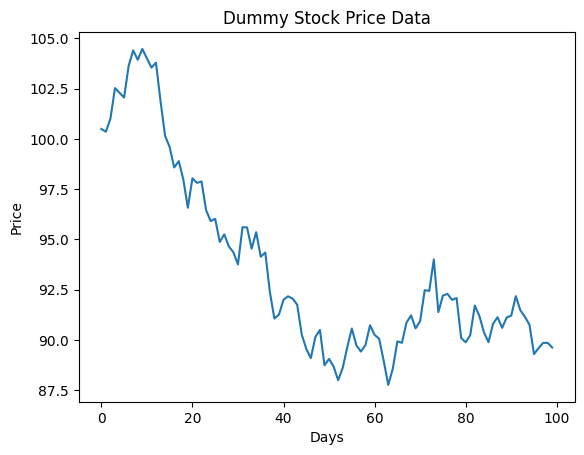

In [4]:
# Generate dummy stock price data
np.random.seed(42)
time_steps = 100
prices = np.cumsum(np.random.randn(time_steps)) + 100

plt.plot(prices)
plt.title("Dummy Stock Price Data")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


### Step 3: Normalize the Data

In [5]:
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

### Step 4: Create Sequences for RNN

In [6]:
X = []
y = []

window_size = 5

for i in range(len(prices_scaled) - window_size):
    X.append(prices_scaled[i:i + window_size])
    y.append(prices_scaled[i + window_size])

X = np.array(X)
y = np.array(y)

print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (95, 5, 1)
Output shape: (95, 1)


### Step 5: Build the RNN Model

In [7]:
model = Sequential()
model.add(SimpleRNN(32, activation='tanh', input_shape=(window_size, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\range\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

### Step 6: Train the Model

In [10]:
history = model.fit(
    X, y,
    epochs=30,
    batch_size=8,
    verbose=1
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0040 
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042  
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0037
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 
Epoch 12/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 
Epoch 13/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 
Epoch 14/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 
Epoch 15/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034  
Epo

### Step 7: Make Predictions

In [14]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


### Step 8: Visualize Results

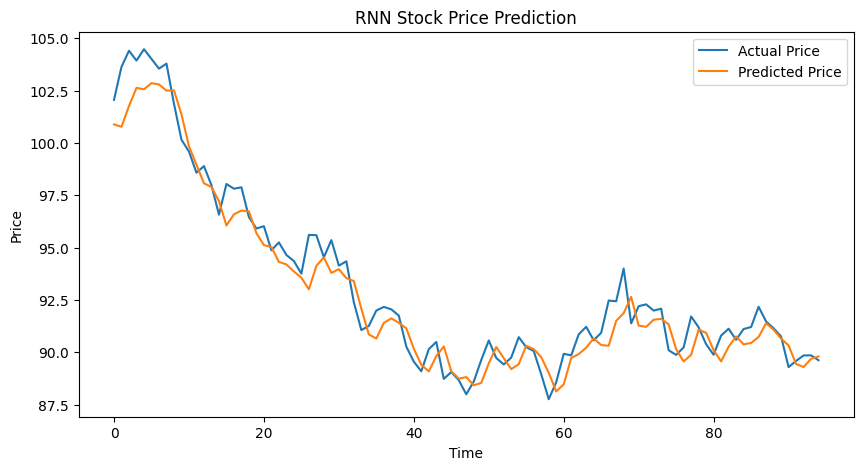

In [12]:
plt.figure(figsize=(10,5))
plt.plot(actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.title("RNN Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

### 6. Output Interpretation

- The predicted line follows the trend of actual prices

- Minor deviations occur due to randomness

- Model successfully learns sequential patterns

### 7. Key Concepts Applied

| Concept                       | Used         |
| ----------------------------- | ------------ |
| Sequential data               | Yes          |
| Hidden state memory           | Yes          |
| Backpropagation Through Time  | Yes          |
| Vanishing gradient discussion | Conceptually |
| SimpleRNN layer               | Yes          |


## The End !! 